In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data prepration 

In [2]:
df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Change the Categorical data using ordinal encoding
df.loc[df['smoker'] == 'yes','smoker'] = 1
df.loc[df['smoker'] == 'no','smoker'] = 0
df['smoker'] = (df['smoker']).astype(int)

#Change the Categorical data using one hot encoding
df['male'] = 0
df['female'] = 0
df.loc[df['sex'] == 'male','male'] = 1
df.loc[df['sex'] == 'female','female'] = 1

df['southwest'] = 0
df['southeast'] = 0
df['northwest'] = 0
df['northeast'] = 0
df.loc[df['region'] == 'southwest','southwest'] = 1
df.loc[df['region'] == 'southeast','southeast'] = 1
df.loc[df['region'] == 'northwest','northwest'] = 1
df.loc[df['region'] == 'northeast','northeast'] = 1

In [4]:
df.head()
df.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker         int32
region        object
charges      float64
male           int64
female         int64
southwest      int64
southeast      int64
northwest      int64
northeast      int64
dtype: object

In [5]:
#remove rows withs missing values
df = df.dropna()

In [6]:
X = df.drop(columns=['sex','region','charges'])
X = (X - X.mean()) / X.std() 
Y = df['charges']
Y = Y.ravel()

In [7]:
X.head()


,age,bmi,children,smoker,male,female,southwest,southeast,northwest,northeast
0,-1.438227,-0.453151,-0.908274,1.969850,-1.010141,1.010141,1.764821,-0.611095,-0.566206,-0.565056
1,-1.509401,0.509431,-0.078738,-0.507273,0.989221,-0.989221,-0.566206,1.635183,-0.566206,-0.565056
2,-0.797655,0.383164,1.580335,-0.507273,0.989221,-0.989221,-0.566206,1.635183,-0.566206,-0.565056
3,-0.441782,-1.305043,-0.908274,-0.507273,0.989221,-0.989221,-0.566206,-0.611095,1.764821,-0.565056
4,-0.512957,-0.292447,-0.908274,-0.507273,0.989221,-0.989221,-0.566206,-0.611095,1.764821,-0.565056


In [8]:
X = np.column_stack((np.ones(X.shape[0]), X))

LR model from scratch

In [9]:
# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
x_train, x_test = X[:split_index], X[split_index:]
y_train, y_test = Y[:split_index], Y[split_index:]


In [10]:
class My_LinearRegression:
    def __init__(self):
        self.weights = None  # Model parameters
        self.bias = None
        self.cost = None

    def fit(self, X, y, learning_rate=0.01, num_iterations=1000):
        m, n = X.shape
        self.weights = np.zeros(n) 
        self.bias = 0
        self.cost = np.zeros(num_iterations)

        for i in range(num_iterations):
            
            # Calculate predictions
            y_pred = np.dot(X, self.weights) + self.bias
            # Calculate cost
            self.cost[i] = (0.5 * (np.sum(y_pred - y)**2) )/ m

            # Compute gradients
            g_weights = (1 / m) * np.dot(X.T, (y_pred - y))
            g_bias = (1 / m) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= learning_rate * g_weights
            self.bias -= learning_rate * g_bias
        # Calculate cost at the final solutin
        self.cost[-1] = 0.5 * (np.sum(y_pred - y)**2) / m

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def cost_function(self):
        return self.cost


In [11]:
# Create the linear regression model
LR_model = My_LinearRegression()

In [12]:
# Vary the number of iterations and learning rates for the plots
num_iterations_list = [200, 500, 1000, 3500]
learning_rates = [0.01, 0.05, 0.1, 0.5]


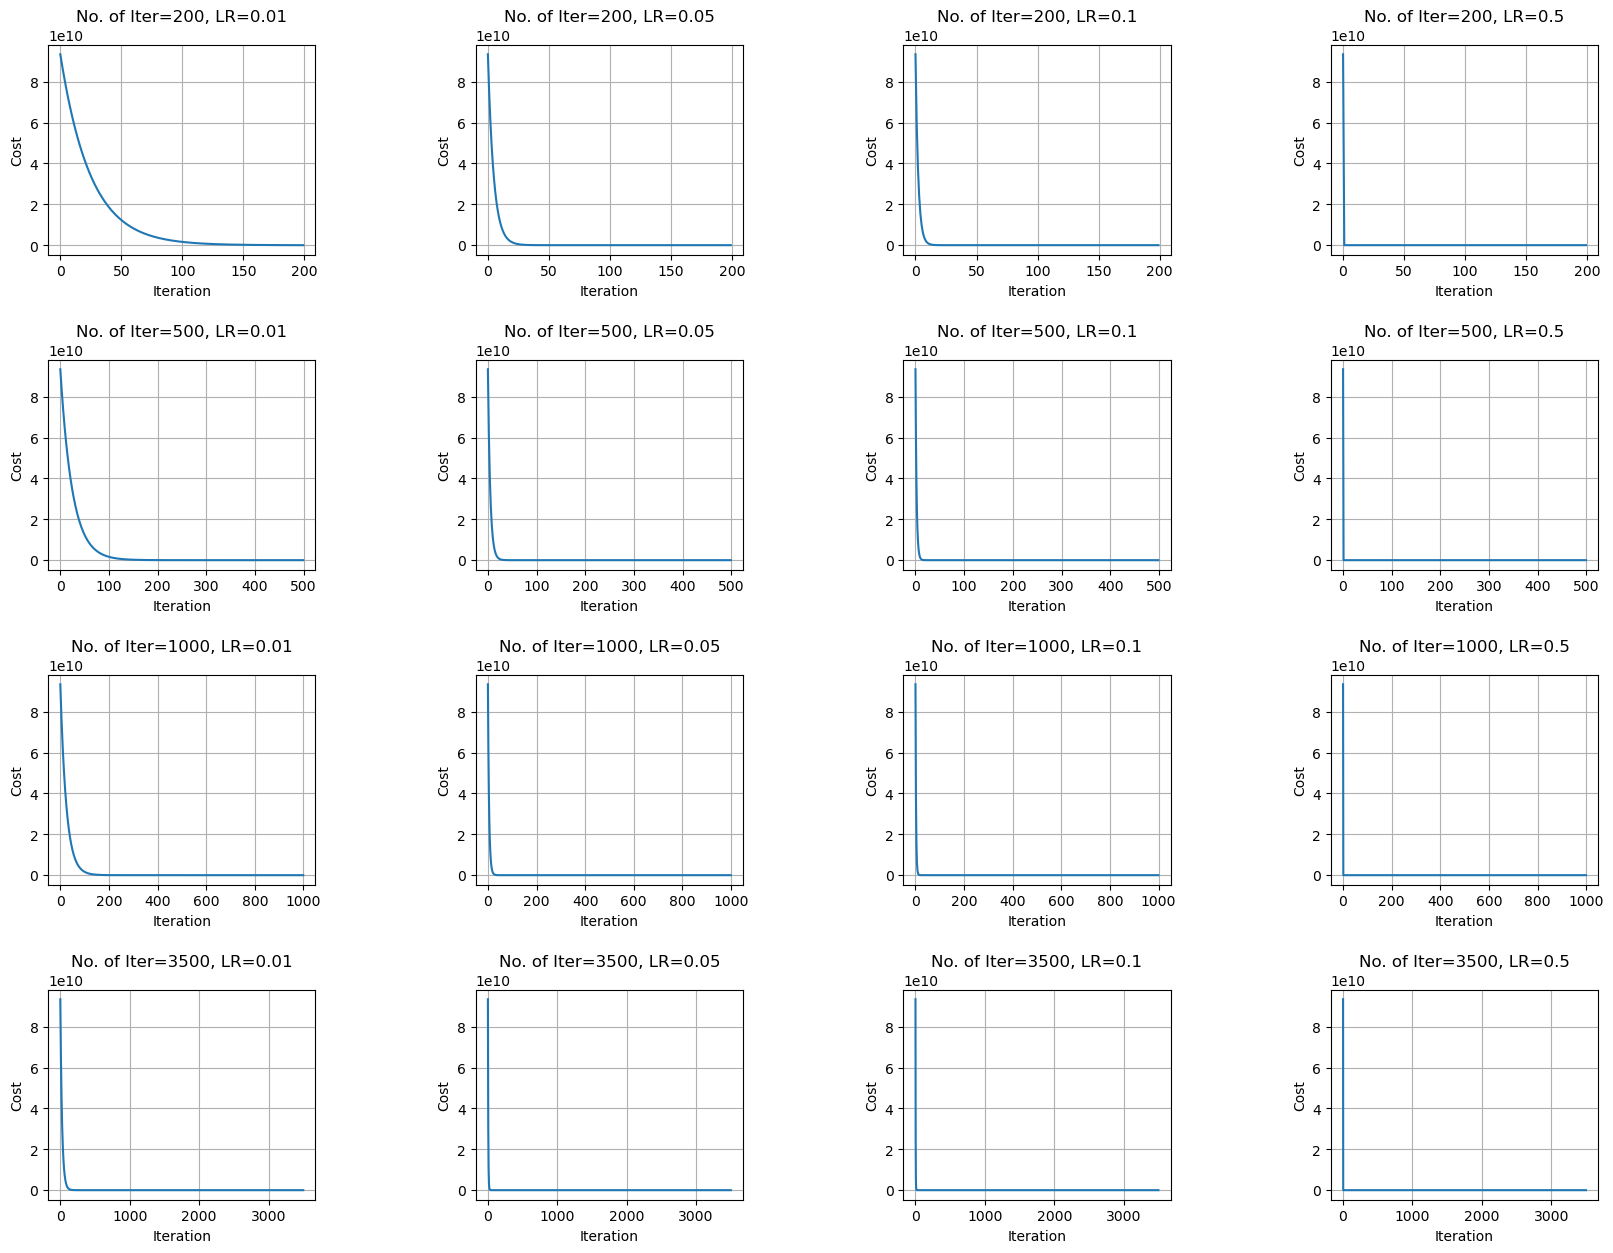

In [13]:
# Create a grid of subplots
fig, axes = plt.subplots(len(num_iterations_list), len(learning_rates), figsize=(20, 15))
plt.subplots_adjust(wspace=0.6, hspace=0.5)
# Iterate through different combinations of number of iterations and learning rates
for i, num_iterations in enumerate(num_iterations_list):
    for j, learning_rate in enumerate(learning_rates):
        # Train the model
        LR_model.fit(x_train, y_train,learning_rate,num_iterations)
        

        # Plot the cost function
        axes[i, j].plot(range(num_iterations), LR_model.cost_function())
        axes[i, j].set_title(f"No. of Iter={num_iterations}, LR={learning_rate}")
        axes[i, j].set_xlabel("Iteration")
        axes[i, j].set_ylabel("Cost")
        axes[i, j].grid(True)
        
        

# Display the plots
plt.show()

In [14]:
# Test the model
prediction = LR_model.predict(x_test)

R-squared (R²) Score: 0.7584847182677396
Mean Squared Error (MSE): 37175951.405714944



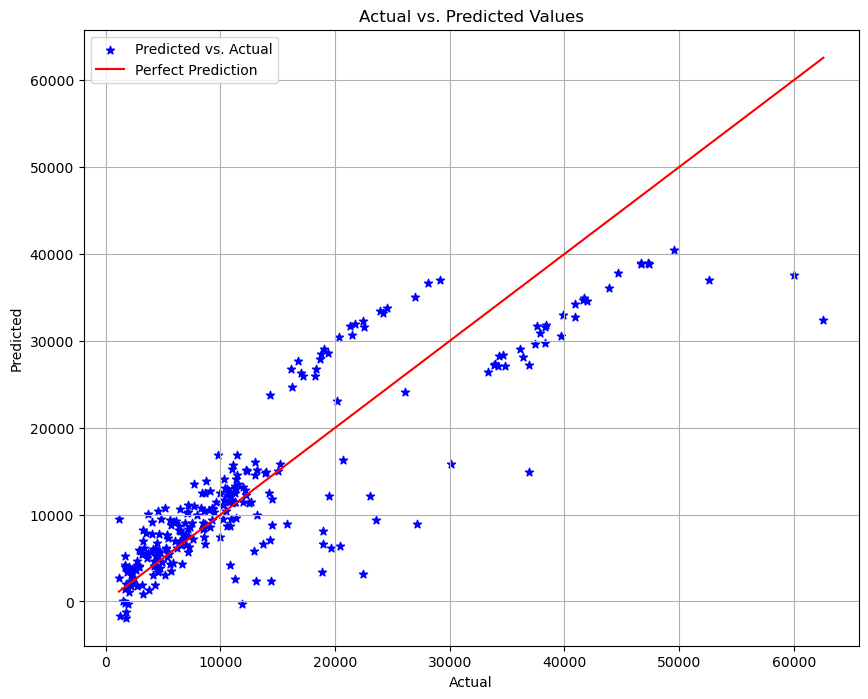

In [15]:
# Evaluate the model
mse = np.mean((y_test - prediction) ** 2)
r2 = 1 - (mse / np.var(y_test))
print(f"R-squared (R²) Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}\n")

plt.figure(figsize=(10, 8))
plt.scatter(y_test, prediction,c='b', marker='*', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', label='Perfect Prediction')
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
        

plt.show()


LR model using scikit-learn library

In [16]:
# LR model using scikit-learn library

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [18]:
# Created a linear regression model and train the
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

LinearRegression()

In [19]:
# Test the model
prediction_2 = model_LR.predict(X_test)

R-squared (R²) Score: 0.7341910287952664
Mean Squared Error (MSE): 39737000.73137307



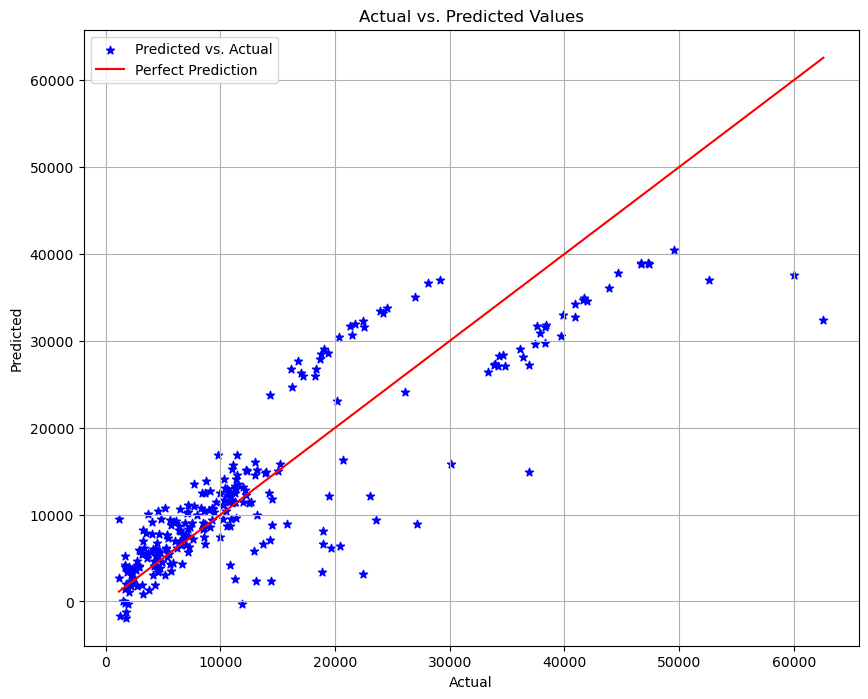

In [20]:
# Evaluate the model
mes_2 = mean_squared_error(Y_test, prediction_2)
r2_2 = r2_score(Y_test, prediction_2)
print(f"R-squared (R²) Score: {r2_2}")
print(f"Mean Squared Error (MSE): {mes_2}\n")

plt.figure(figsize=(10, 8))
plt.scatter(y_test, prediction,c='b', marker='*', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', label='Perfect Prediction')
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
        

plt.show()